Alunos:
  - Fabiane Sorbar
  - Vinicius Tessele   

  
  Realize a classificação na base CIFAR10 [2]. Avalie o desempenho e discuta.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.utils import shuffle

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [24]:
# Carrega e prepara os dados
ds = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = ds.load_data()

# Achata os rótulos
y_train_full = y_train_full.ravel()
y_test = y_test.ravel()

# Normalização e divisão
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Embaralha os dados de treino
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [25]:
def criarModelo(neuroniosPrimeiraCamadaOculta, neuroniosSegundaCamadaOculta):
  global model
  model = keras.models.Sequential([
      keras.layers.Input(shape=(32, 32,3)),
      keras.layers.Flatten(),
      keras.layers.Dense(neuroniosPrimeiraCamadaOculta, activation="relu"),
      keras.layers.Dense(neuroniosSegundaCamadaOculta, activation="relu"),
      keras.layers.Dense(10, activation="softmax")
  ])
  return model

def criarModeloIdealImagem(neuroniosPrimeiraCamadaOculta, neuroniosSegundaCamadaOculta):
  global model
  model = keras.models.Sequential([
      keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Conv2D(64, (3, 3), activation='relu'),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Flatten(),
      keras.layers.Dense(neuroniosPrimeiraCamadaOculta, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(neuroniosSegundaCamadaOculta, activation='softmax')
  ])
  return model

def compilarModelo(otimizador):
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer= otimizador,
                metrics=["accuracy"])
  return model

def treinar(numEpocas):
  history = model.fit(X_train, y_train, epochs=numEpocas,
                      validation_data=(X_valid, y_valid))
  return history

def plotarMatrizDeConfusao(nome, X_novos, y_novos, class_names):
  print(f'Gerando matriz de confusão {nome}...\n')

  y_proba = model.predict(X_novos)
  y_pred = np.argmax(y_proba, axis=1)

  matriz_confusao = confusion_matrix(y_novos, y_pred)

  plt.figure(figsize=(10, 8))
  sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Classe Predita')
  plt.ylabel('Classe Verdadeira')
  plt.title(f'Matriz de Confusão - {nome}')
  plt.tight_layout()
  plt.show()
  return

def plotarCurvaDeAcuracia(history):
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.show()
  return

def avaliarConjuntoTestesDesconhecido(nome_modelo):
  resultado = model.evaluate(X_test, y_test, verbose=0)
  print(f"{nome_modelo} - Loss: {resultado[0]:.4f}, Acurácia: {resultado[1]:.4f}")
  return resultado

**No primeiro momento utilizamos 300 na primeira camada e 100 nasegunda o modelo SGD (Stochastic Gradient Descent)**


🚧 Treinando Modelo 'Base' com Otimizador 'sgd'
Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2736 - loss: 1.9917 - val_accuracy: 0.3256 - val_loss: 1.8707
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3906 - loss: 1.7240 - val_accuracy: 0.3762 - val_loss: 1.7167
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4199 - loss: 1.6357 - val_accuracy: 0.4022 - val_loss: 1.6553
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4421 - loss: 1.5815 - val_accuracy: 0.4180 - val_loss: 1.5912
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4563 - loss: 1.5364 - val_accuracy: 0.4646 - val_loss: 1.5310
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4702 - loss: 1.4902 - val_accuracy: 0.4216 - val_loss: 1.6206
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4813 - loss: 1.4528 - val_accuracy: 0.4562 - val_loss: 1.5348
Epoch 8/30
1407/1407 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 49ms/step - accuracy: 0.1719 - loss: 2.4807 - val_accuracy: 0.2864 - val_loss: 1.9121
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.3403 - loss: 1.8375 - val_accuracy: 0.4058 - val_loss: 1.6585
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.4243 - loss: 1.6043 - val_accuracy: 0.4776 - val_loss: 1.4527
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.4702 - loss: 1.4756 - val_accuracy: 0.4820 - val_loss: 1.4613
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.5051 - loss: 1.3906 - val_accuracy: 0.4912 - val_loss: 1.3990
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.5336 - loss: 1.3136 - val_accuracy: 0.5366 - val_loss: 1.2891
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.5574 - loss: 1.2457 - val_accuracy: 0.5838 - val_loss: 1.1790
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 68s 48ms/step - accuracy: 0.5758 -

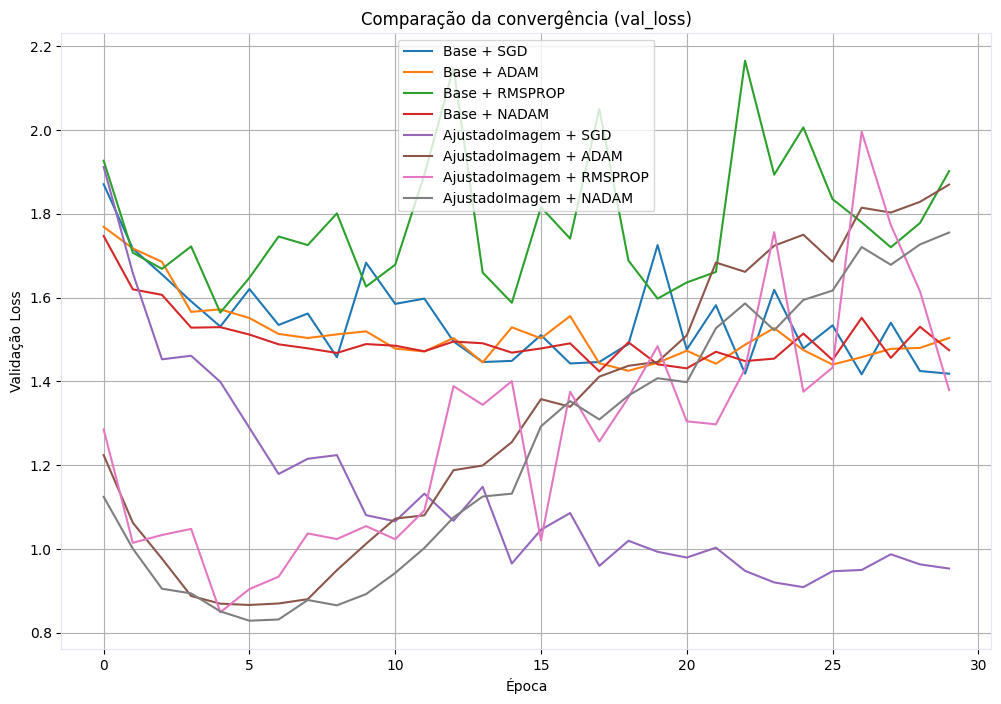

In [26]:
optimizers = {
    "sgd": keras.optimizers.SGD(),
    "Adam": keras.optimizers.Adam(),
    "RMSprop": keras.optimizers.RMSprop(),
    "Nadam": keras.optimizers.Nadam()
}

model_builders = {
    "Base": criarModelo,
    "AjustadoImagem": criarModeloIdealImagem
}

results = []

for model_name, build_fn in model_builders.items():
    for opt_name, opt in optimizers.items():
        print(f"\n🚧 Treinando Modelo '{model_name}' com Otimizador '{opt_name}'")

        build_fn(300, 100)

        compilarModelo(opt_name.lower())

        # Treinar
        history = treinar(30)

        # Avaliar e plotar matriz de confusão
        #plotarMatrizDeConfusao(f"Modelo - {model_name} + {opt_name}", X_test / 255.0, y_test, class_names)
        loss, acc = avaliarConjuntoTestesDesconhecido(f"{model_name} + {opt_name.upper()}")

        # Salvar resultados
        results.append({
            "Modelo": model_name,
            "Otimizador": opt_name.upper(),
            "Loss final": loss,
            "Acurácia final": acc,
            "Histórico": history
        })

# Organizar dataframe sem o histórico para visualização
df_resultados = pd.DataFrame(results).drop(columns=['Histórico'])

print("📊 Comparativo de Acurácia Final:")
print(df_resultados.sort_values(by="Acurácia final", ascending=False))

plt.figure(figsize=(12, 8))
for r in results:
    label = f"{r['Modelo']} + {r['Otimizador']}"
    plt.plot(r["Histórico"].history["val_loss"], label=label)
plt.xlabel("Época")
plt.ylabel("Validação Loss")
plt.title("Comparação da convergência (val_loss)")
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Probability scores:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[8 8 0 0 8 1 1 0 3 1 0 9 3 7 8 8 5 9 8 1]
Predicted classes:
 ['ship' 'ship' 'airplane' 'airplane' 'ship' 'automobile' 'automobile'
 'airplane' 'cat' 'automobile' 'airplane' 'truck' 'cat' 'horse' 'ship'
 'ship' 'dog' 'truck' 'ship' 'automobile']


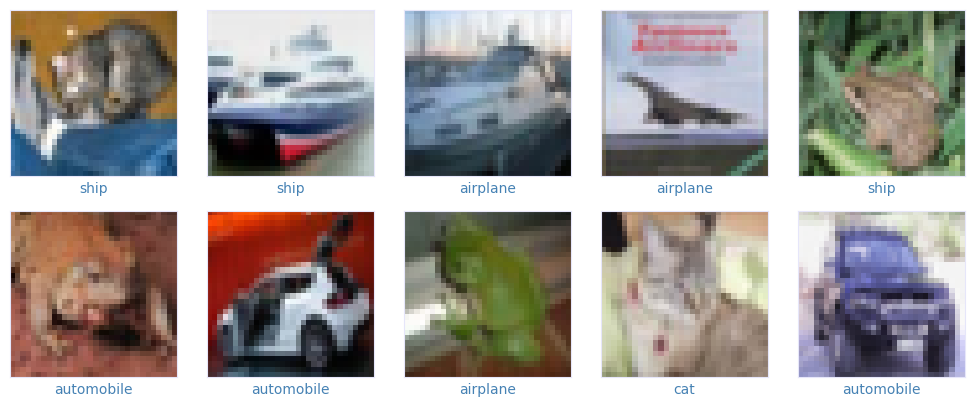

In [27]:
X_new = X_test[:20]
y_proba = model.predict(X_new)

print(f'Probability scores:\n {y_proba.round(2)}')

classes_y = np.argmax(y_proba, axis=1)

print(classes_y)

print(f'Predicted classes:\n {np.array(class_names)[classes_y]}')

plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(10, 8))

for i in range(10):  # First 20 instances
    plt.subplot(4, 5, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_new[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[classes_y[i]], color='steelblue')

plt.tight_layout()
plt.show()

O modelo AjustadoImagem com ADAM obteve a melhor acurácia: 54.48%.

O SGD também teve bom desempenho no AjustadoImagem 53.31%.

O pior desempenho foi com RMSPROP, tanto na versão base 34% quanto ajustada 38%.

De forma geral, modelos ajustados superaram os modelos base, indicando que a arquitetura aprimorada ajuda.